In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler # 데이터 scaling
from sklearn.model_selection import train_test_split  # 데이터 분할 : train, test

from sklearn.neighbors import KNeighborsClassifier # 분류 KNN
from sklearn.model_selection import GridSearchCV # 최적모델, 파라미터 검색

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, roc_curve, auc


In [2]:
# engine: 파일명 또는 데이터에 한글 포함 -> "python" 사용
# df_raw = pd.read_csv("/home/pirl/test/BigData/FITNESS_결측.csv", engine = "python")
df_raw = pd.read_csv("./df_t.csv")
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,Vol
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,934,1,8,2조,7.850335
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,937,1,8,2조,7.850335
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,889,1,8,3조,7.850280
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,885,1,8,3조,7.850280
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,873,1,8,1조,7.850376


In [3]:
df_raw_y = df_raw["SCALE"]
df_raw_x = df_raw.drop(["SCALE", "PLATE_NO", "ROLLING_DATE"], axis = 1, inplace = False)
df_raw_x =  pd.get_dummies(df_raw_x)
df_raw_x.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,32.25,3707,15109,14180,1,1144,116,1133,59,282,...,0,0,0,1,0,0,0,1,0,0
1,32.25,3707,15109,14180,2,1144,122,1135,53,283,...,0,0,0,1,0,0,0,1,0,0
2,33.27,3619,19181,18130,1,1129,116,1121,55,282,...,0,0,1,0,1,0,0,0,1,0
3,33.27,3619,19181,18130,2,1152,125,1127,68,316,...,0,0,1,0,1,0,0,0,1,0
4,38.33,3098,13334,12430,1,1140,134,1128,48,314,...,0,0,1,0,0,1,1,0,0,0


In [4]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y .shape))

train data X size : (504, 96)
train data Y size : (504,)
test data X size : (216, 96)
test data Y size : (216,)


In [5]:
# KNN 모델 생성(default 설정)
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(knn_uncustomized.score(df_train_x,df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(knn_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 0.788
Accuracy on test set: 0.759


In [6]:
# train 및 test 정확도 결과 저장용
train_accuracy =[]; test_accuracy=[]
# 최대 이웃 수: 1~15
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy

# 확인
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.722
1,2,0.865,0.755
2,3,0.827,0.759
3,4,0.788,0.755
4,5,0.788,0.759
5,6,0.786,0.736
6,7,0.784,0.755
7,8,0.766,0.731
8,9,0.782,0.764
9,10,0.764,0.731


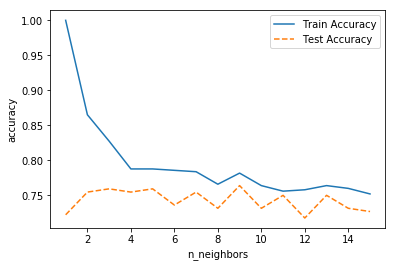

In [7]:
#모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy");
plt.xlabel("n_neighbors");
plt.legend()

In [8]:
# 임의로 지정
n_neighbors = 9

In [9]:
# train 및 test 정확도 결과 저장용
train_accuracy =[]; test_accuracy=[]
# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 2
# 가중치(uniform, distance)
para_weights = (["uniform"])*10 + (["distance"]*10)

# zip(list1, list2, ...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors = para_n_neihtbor[0], weight = para_weight[0]
# 2번 loop: n_neighbors = para_n_neihtbor[1], weight = para_weight[1]

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, weights=v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy

# 확인
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.722
1,2,uniform,0.865,0.755
2,3,uniform,0.827,0.759
3,4,uniform,0.788,0.755
4,5,uniform,0.788,0.759
5,6,uniform,0.786,0.736
6,7,uniform,0.784,0.755
7,8,uniform,0.766,0.731
8,9,uniform,0.782,0.764
9,10,uniform,0.764,0.731


In [10]:
# 그림을 그리기 위해 데이터의 형태를 변환
df_accuracy_weights_pivots = df_accuracy_weights.pivot(index="Neighbors",
                                                      columns="Weights",
                                                      values=["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivots

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.722222  0.722222
2                   1.0  0.865079     0.722222  0.754630
3                   1.0  0.827381     0.754630  0.759259
4                   1.0  0.787698     0.759259  0.754630
5                   1.0  0.787698     0.759259  0.759259
6                   1.0  0.785714     0.768519  0.736111
7                   1.0  0.783730     0.750000  0.754630
8                   1.0  0.765873     0.745370  0.731481
9                   1.0  0.781746     0.745370  0.763889
10                  1.0  0.763889     0.736111  0.731481

In [11]:
# pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivots.columns.get_level_values(0)
level1 = df_accuracy_weights_pivots.columns.get_level_values(1)
df_accuracy_weights_pivots.columns = level0 + "_" + level1
df_accuracy_weights_pivots.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.722222,0.722222
2,1.0,0.865079,0.722222,0.754630
3,1.0,0.827381,0.754630,0.759259
4,1.0,0.787698,0.759259,0.754630
5,1.0,0.787698,0.759259,0.759259


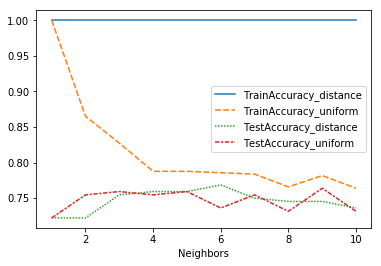

In [12]:
# 그래프 생성. 변수 별 linestyle 구분
sns.lineplot(data=df_accuracy_weights_pivots)

In [13]:
# 임의로 지정
weigths = "uniform"

In [14]:
# train 및 test 정확도 결과 저장용
train_accuracy =[]; test_accuracy=[]
# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 3
# 거리계산방법 (minkowski, euclidean, manhattan)
para_metric = (["minkowski"])*10 + (["euclidean"]*10) + (["manhattan"]*10)

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, metric=v_metric, weights="uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy

# 확인
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.722
1,2,minkowski,0.865,0.755
2,3,minkowski,0.827,0.759
3,4,minkowski,0.788,0.755
4,5,minkowski,0.788,0.759
5,6,minkowski,0.786,0.736
6,7,minkowski,0.784,0.755
7,8,minkowski,0.766,0.731
8,9,minkowski,0.782,0.764
9,10,minkowski,0.764,0.731


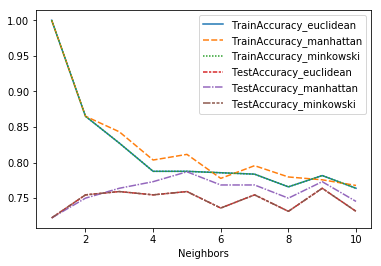

In [15]:

# 정확도를 그래프로 그림
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index="Neighbors",
                                                      columns="Metric",
                                                      values=["TrainAccuracy", "TestAccuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data = df_accuracy_metric_pivot)

In [16]:
# 최종모델
knn_model = KNeighborsClassifier(n_neighbors=4, weights="uniform", metric="euclidean")
knn_model.fit(df_train_x,df_train_y)
# 평가
y_pred = knn_model.predict(df_test_x)

# Train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(knn_model.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(knn_model.score(df_test_x, df_test_y)))
#confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.788
Accuracy on test set: 0.755
Confusion matrix: 
[[137   8]
 [ 45  26]]


Text(0.5, 257.44, 'Predicted label')

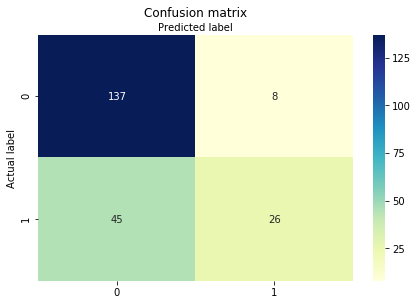

In [22]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(df_test_y, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
print("Accuracy:",metrics.accuracy_score(df_test_y, y_pred))
print("Precision:",metrics.precision_score(df_test_y, y_pred))
print("Recall:",metrics.recall_score(df_test_y, y_pred))

Accuracy: 0.7546296296296297
Precision: 0.7647058823529411
Recall: 0.36619718309859156


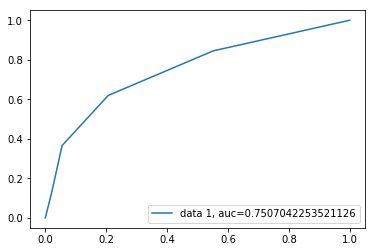

In [25]:
y_pred_proba = knn_model.predict_proba(df_test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(df_test_y,  y_pred_proba)
auc = metrics.roc_auc_score(df_test_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [29]:
f1_score(df_test_y, y_pred)

0.49523809523809526